## Esercizio: Pacchetto `random`

**Python fornisce il pacchetto `random` per gestire numeri pseudo-casuali**

* Noi ne useremo solo una piccola parte
* Al solito, potete trovare maggiori informazioni nella documentazione online
* ...O usando la funzione `help`

In [1]:
help('random')

Help on module random:

NAME
    random - Random variable generators.

MODULE REFERENCE
    https://docs.python.org/3.9/library/random
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
        bytes
        -----
               uniform bytes (values between 0 and 255)
    
        integers
        --------
               uniform within range
    
        sequences
        ---------
               pick random element
               pick random sample
               pick weighted random sample
               generate random permutation
    
        distributions on the real line:
        ------------------------------
               uniform
               triangular
               normal (Gaussian)
      

## Alcune Funzioni Notevoli

**Vediamo alcune funzioni di cui faremo uso:**

Si usa seed per inizializzare il generatore di numeri pseudo-casuali:

In [2]:
import random

random.seed(42)

* Fissato il "seme", i numeri generati dal pacchetto diventano predicibili
* Si tratta di un comportamento molto utile in fase di debugging

In [3]:
random.seed()

* Se non si passano argomenti, `seed` usa come seme l'ora corrente
* ...Così abbiamo l'illusione che i riusultati siano davvero incontrolllabili

## Alcune Funzioni Notevoli

**Si può ottenere un numero "casuale" intero in $\{l, l+1, \ldots u\}$ con:**

In [4]:
l, u = 1, 6
random.randint(l, u)

5

**Si può ottenere una numero preso a caso da una collezione con:**

In [5]:
random.choice([2, 4, 6, 8])

8

**Si può ottenere un numero casuale floating point in $[0, 1)$ con:**

In [6]:
random.random()

0.8134963679486341

## Istogrammi

**Per visualizzare i risultati di un esperimento casuale**

...Si usa spetto un grafico a barre detto istogramma

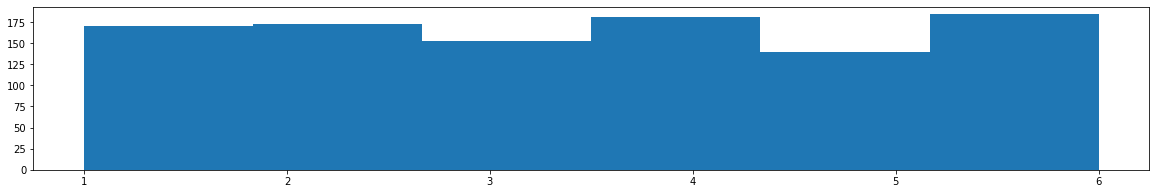

In [7]:
n = 6
x = [random.randint(1, n) for v in range(1000)] # simulo il lancio di 1000 d6

from matplotlib import pyplot as plt
plt.figure(figsize=(20, 3))
plt.hist(x, bins=n)
plt.show()

* Un istogramma di $x$ divide i valori in "bin" (intervalli disgiunti e contigui)
* Quindi conta il numero di volte che un valore è caduto in ciascun bin

## Istogrammi

**È possibile specificare esplicitamente gli estremi dei bin**

bins: [1, 2, 3, 4, 5, 6, 7]


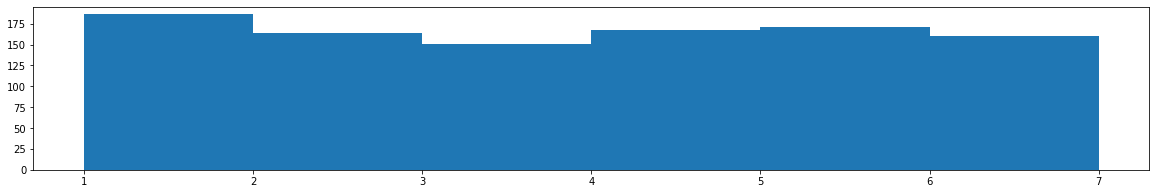

In [8]:
n = 6
x = [random.randint(1, n) for v in range(1000)] # simulo il lancio di 1000 d6
bins = [v for v in range(1, n+2)]
print(f'bins: {bins}')
plt.figure(figsize=(20, 3))
plt.hist(x, bins=bins)
plt.show()

* L'argomento `bins` in questo caso è una collezione con gli estremi dei bin

## Probabilità non Uniformi

**Si può influenzare la proababilità di selezione di alcuni valori**

E.g. per generare il valore 0 nel 70% dei casi ed il valore 1 nel 30% dei casi

* Generare un numero $v$ (floating point) in $[0, 1)$
* Convertirlo in 0 se $v < 0.7$
* Convertirlo in 1 se $v \geq 0.7$

**Lo stesso metodo si può generalizzare ad $n$ valori diversi**

Questa tecnica è utilizzata nella funzione:

In [9]:
random.choices([0, 1], weights=[0.7, 0.3], k=1)

[0]

* È simile a choice , ma permette di specificare dei pesi (probabilità)
* ...E restituisce k valori in una lista

## Esercizio

**Si definisca una funzione:**

```python
def dice(n, k)
```

* Che calcoli la somma di $n$ dadi con $k$ facce

Quindi:

* Si usi la funzione per effettuare $m$ esperimenti (tiri di dadi)
* Si disegni un istogramma con $nk$ bin
* Si osservi come cambia il grafico al variare di $n$ and $m$

In [10]:
n = 8
m = 20000
k = 6
bins = [v for v in range(1, n*k+1)]

Si calcoli il valore della media:

$$
\mu = \frac{1}{m} \sum_{i=1}^m x_i
$$

## Esercizio

**Si definisca una funzione:**

```python
def dice_reroll(n, k, thr)
```

* Che calcoli la somma di $n$ dadi con $k$ facce
* ...Ma in cui ogni dato inferiore o uguale a `thr` viene ritirato una volta

Quindi:

* Si usi la funzione per effettuare $m$ esperimenti (tiri di dadi)
* Si disegni un istogramma con $nk$ bin
* ...E si stampi a video il valore della media
* Si osservi come cambiano grafico e media al variare di `thr`

In [12]:
n = 8
m = 20000
k = 6
thr = 1
bins = [v for v in range(1, n*k+1)]